In [1]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Sales_Data_12102022_Wed.xlsx')
print('\n')
print('Shape of the data is',df.shape,)
print('\n')
print('The top 5 rows of the data read as under')
df.head()



Shape of the data is (2747, 20)


The top 5 rows of the data read as under


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [5]:
display(round(df.describe().T,2))

count      mean      std       min       25%       50%  \
ORDERNUMBER           2747.0  10259.76    91.88  10100.00  10181.00  10264.00   
QUANTITYORDERED       2747.0     35.10     9.76      6.00     27.00     35.00   
PRICEEACH             2747.0    101.10    42.04     26.88     68.74     95.55   
ORDERLINENUMBER       2747.0      6.49     4.23      1.00      3.00      6.00   
SALES                 2747.0   3553.05  1838.95    482.13   2204.35   3184.80   
DAYS_SINCE_LASTORDER  2747.0   1757.09   819.28     42.00   1077.00   1761.00   
MSRP                  2747.0    100.69    40.11     33.00     68.00     99.00   

                           75%       max  
ORDERNUMBER           10334.50  10425.00  
QUANTITYORDERED          43.00     97.00  
PRICEEACH               127.10    252.87  
ORDERLINENUMBER           9.00     18.00  
SALES                  4503.09  14082.80  
DAYS_SINCE_LASTORDER   2436.50   3562.00  
MSRP                    124.00    214.00

In [6]:
print(len(df.columns))
df.columns

20


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

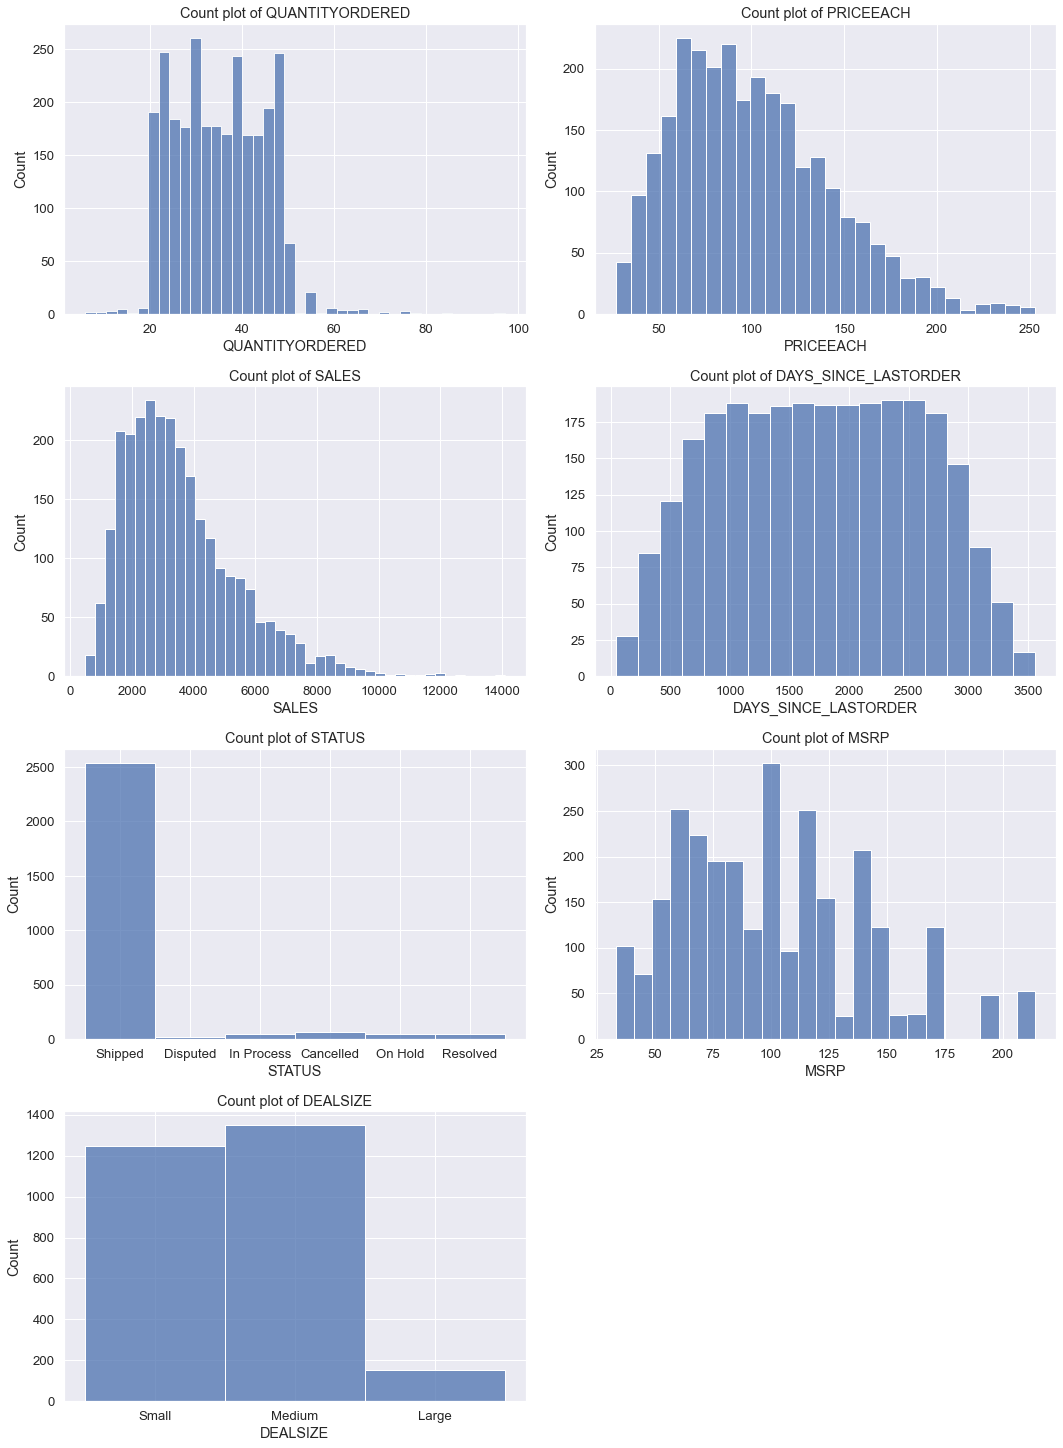

In [18]:
plt.figure(figsize = (15,50))
feature_list = ['QUANTITYORDERED', 'PRICEEACH', 'SALES','DAYS_SINCE_LASTORDER', 'STATUS','MSRP','DEALSIZE']
sns.set(font_scale=1.2)
for i in range(len(feature_list)):
    plt.subplot(10, 2, i + 1)
    sns.histplot(x = df[feature_list[i]],kde=False)
    plt.title('Count plot of {}'.format(feature_list[i]))
    plt.tight_layout()

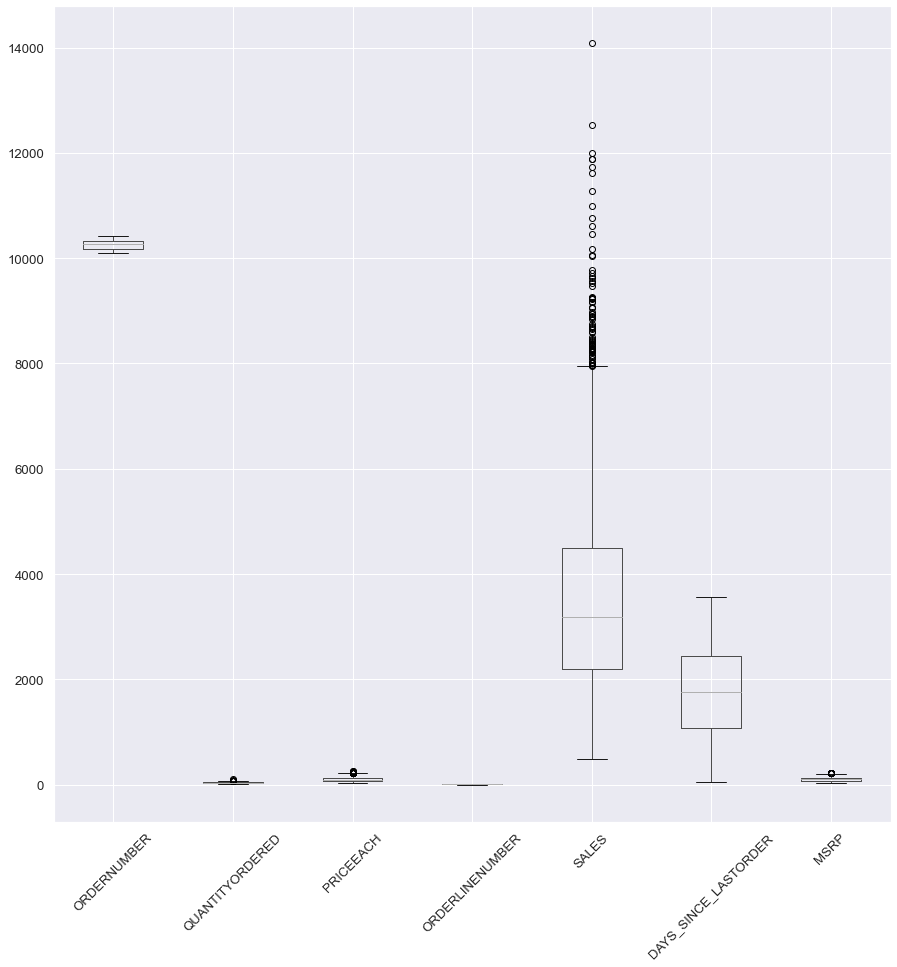

In [8]:
plt.figure(figsize=(15,15))
df.boxplot();
plt.xticks(rotation=45);

In [9]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [17]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]